## **Machine Problem 2** - Predicting House Prices with Multiple Regression

---
**Objective**
- To apply multiple regression techniques learned in the course to predict house prices based on
various factors such as location, size, number of bedrooms, and age of the property. This problem
simulates a real-world scenario where you need to create a predictive model that can assist real estate
agents in estimating house prices more accurately.

**Problem Statement**
- You are a data scientist working for a real estate company. Your task is to develop a
predictive model that can estimate the prices of houses in a particular city. The dataset provided includes
multiple features, such as the size of the house (in square feet), the number of bedrooms, the age of the
house, the proximity to downtown (in miles), and the house price. Your goal is to build a multiple
regression model that can accurately predict house prices based on these features.

**Dataset Overview** - The dataset consists of the following columns:
- Size (sq. ft.): Size of the house in square feet.

- Bedrooms: Number of bedrooms in the house.

- Age: Age of the house in years.

- Proximity to Downtown (miles): Distance of the house from the downtown area.

- Price: Actual price of the house (in thousands of dollars).




**Importing Libraries and CSV**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

1. **Data Exploration and Visualization**

*   Exploratory Data Analysis (EDA)



In [ ]:
df = pd.read_csv('datasets_house_prices.csv')

In [ ]:
df.head()

,Size (sqft),Bedrooms,Age,Proximity to Downtown (miles),Price
0,3974,1,97,2.032719,1.162771e+06
1,1660,5,88,23.695207,4.900021e+05
2,2094,4,49,6.440232,6.400737e+05
3,1930,2,28,8.129315,5.637881e+05
4,1895,1,56,5.358837,5.651289e+05


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Size (sqft)                    1000 non-null   int64  
 1   Bedrooms                       1000 non-null   int64  
 2   Age                            1000 non-null   int64  
 3   Proximity to Downtown (miles)  1000 non-null   float64
 4   Price                          1000 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 39.2 KB
None


In [ ]:
print(df.describe())

       Size (sqft)     Bedrooms          Age  Proximity to Downtown (miles)  \
count  1000.000000  1000.000000  1000.000000                    1000.000000   
mean   2429.857000     2.993000    48.335000                      15.289063   
std     929.914229     1.424423    29.203384                       8.546139   
min     801.000000     1.000000     0.000000                       0.500343   
25%    1629.500000     2.000000    22.000000                       8.475528   
50%    2430.500000     3.000000    47.000000                      15.239628   
75%    3254.250000     4.000000    74.000000                      22.765188   
max    3997.000000     5.000000    99.000000                      29.935715   

              Price  
count  1.000000e+03  
mean   7.190532e+05  
std    2.789818e+05  
min    2.159455e+05  
25%    4.789045e+05  
50%    7.128781e+05  
75%    9.680664e+05  
max    1.212350e+06  


In [ ]:
print(df.isnull().sum())

Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64


*   Visualizing the Data

<ipython-input-7-1cb1687b648f>:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Bedrooms', y='Price', ci=None, color='lightgreen')


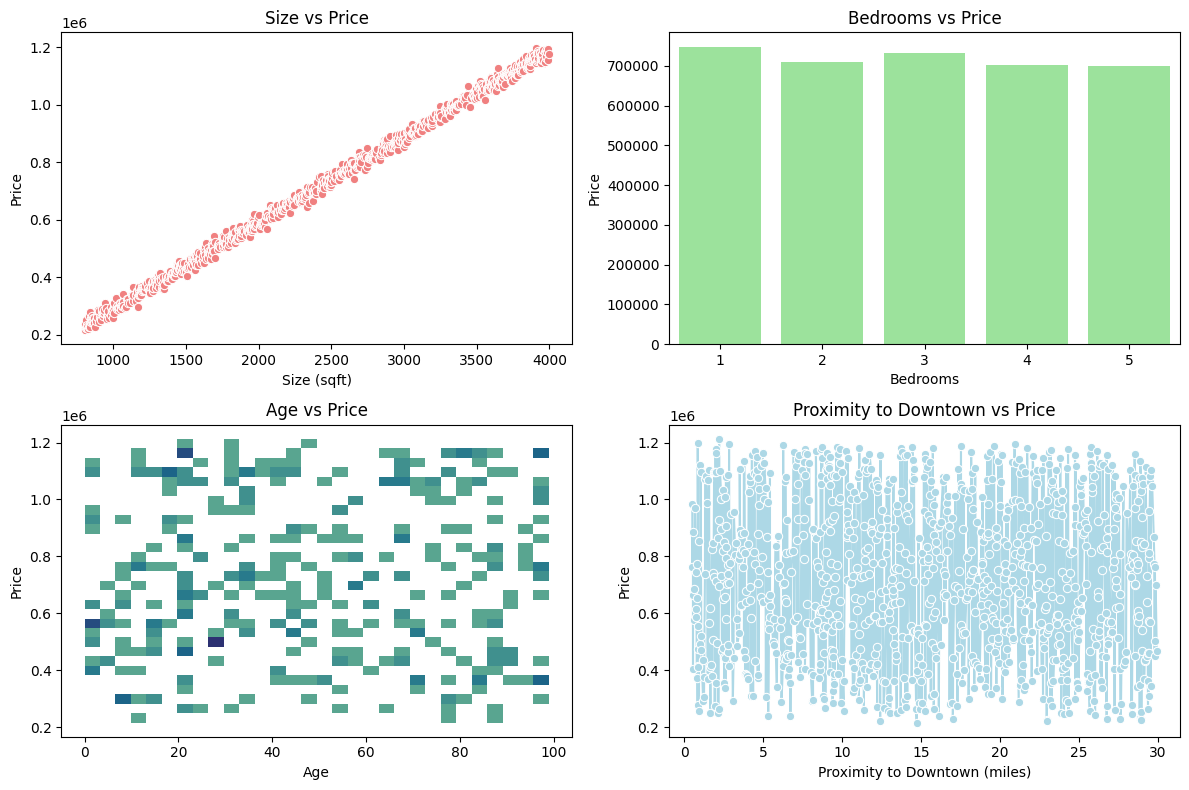

In [ ]:
# Set pastel color palette for all plots
sns.set_palette("pastel")

plt.figure(figsize=(12, 8))

# Line plot for Proximity to Downtown vs Price
plt.subplot(2, 2, 4)
sns.lineplot(data=df, x='Proximity to Downtown (miles)', y='Price', marker='o', color='lightblue')
plt.title('Proximity to Downtown vs Price')

# Histogram for Age vs Price
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='Age', y='Price', bins=30, pthresh=.05, cmap="crest")  # Use a pastel-like colormap
plt.title('Age vs Price')

# Line plot for Size vs Price
plt.subplot(2, 2, 1)
sns.lineplot(data=df, x='Size (sqft)', y='Price', marker='o', color='lightcoral')
plt.title('Size vs Price')

# Bar plot for Bedrooms vs Price
plt.subplot(2, 2, 2)
sns.barplot(data=df, x='Bedrooms', y='Price', ci=None, color='lightgreen')
plt.title('Bedrooms vs Price')

plt.tight_layout()
plt.show()

<ipython-input-20-a7f3b0db352b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Price'], shade=True, color='pink')


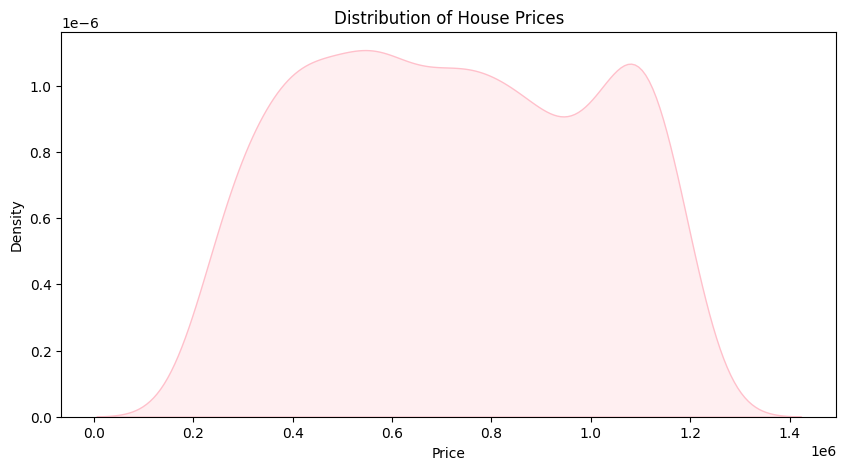

In [ ]:
plt.figure(figsize=(10, 5))

# KDE plot with pink color
sns.kdeplot(df['Price'], shade=True, color='pink')

plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

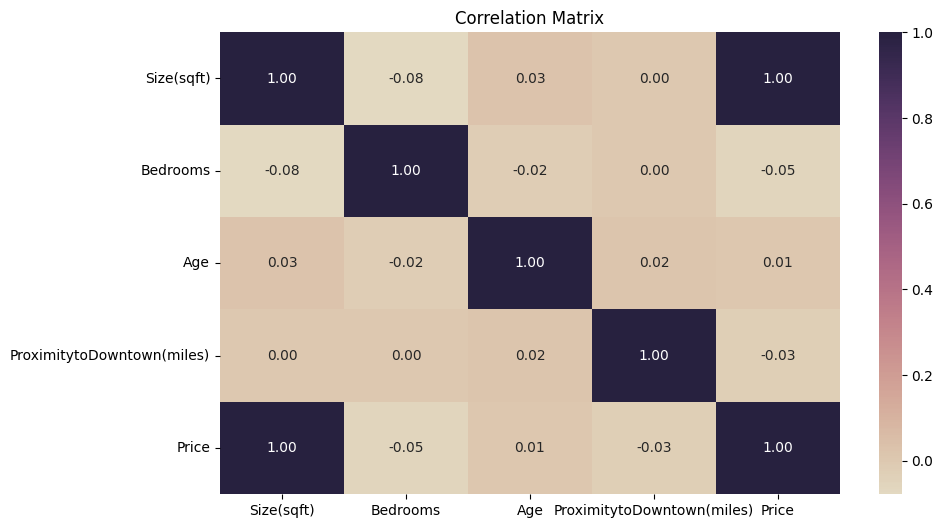

In [ ]:

cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)

plt.figure(figsize=(10, 6))

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=cmap)

plt.title('Correlation Matrix')
plt.show()

2. **Data Preprocessing**

*   Handling Missing Value

In [ ]:
print(df.isnull().sum())

Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64


In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
print(df.columns)

Index(['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)',
       'Price'],
      dtype='object')


*   Normalizing the Features
*   Encode any categorical variables, if necessary



In [ ]:
scaler = StandardScaler()

X = scaler.fit_transform(df[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']])
y = df['Price']

In [ ]:
df.columns = df.columns.str.replace(' ', '')

3. **Model Development**


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
LinearRegression()

LinearRegression()

In [ ]:
coefficients = pd.DataFrame(model.coef_, ['Size (sq. ft.)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)'], columns=['Coefficient'])
print(coefficients)

                                 Coefficient
Size (sq. ft.)                 278975.285938
Bedrooms                         6804.519001
Age                             -6082.939258
Proximity to Downtown (miles)   -8459.853956


4. **Model Evaluation**

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 100214724.63
R-squared: 1.00


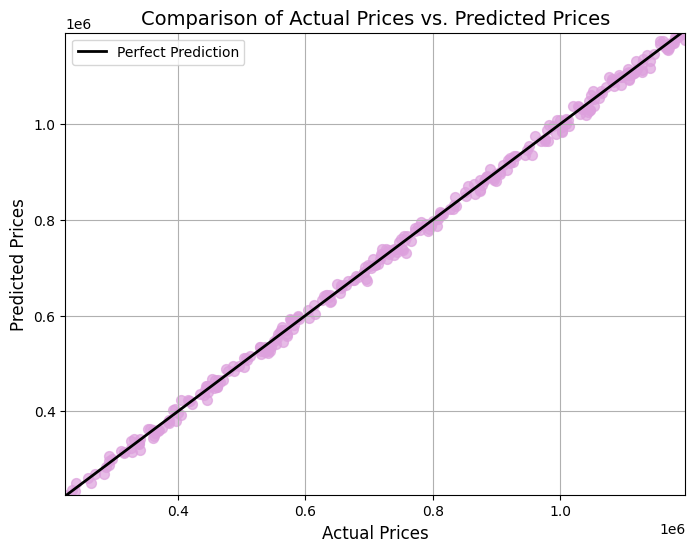

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, marker='o', s=50, alpha=0.7, color='plum')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linewidth=2, label='Perfect Prediction')
plt.xlim(min(y_test) - 10, max(y_test) + 10)
plt.ylim(min(y_pred) - 10, max(y_pred) + 10)
plt.xlabel('Actual Prices', fontsize=12)
plt.ylabel('Predicted Prices', fontsize=12)
plt.title('Comparison of Actual Prices vs. Predicted Prices', fontsize=14)
plt.grid(True)
plt.legend()
plt.savefig('actual_vs_predicted_prices.png', dpi=300)
plt.show()